In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

The crop data that I will be using is called Crop Recommendation Dataset by Atharva Ingle on Kaggle. Ref: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

In [2]:
crop_data = pd.read_csv('/content/drive/MyDrive/Colabs/data analysis practice/Crop recommendation data/Crop_recommendation.csv')

In [3]:
# Checking data
crop_data.head(5)

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

When I glanced at the data, it did not have a lot of information in it. <br> I was expecting the quality of crops to be present too so that I can explore wha kind of environment conditions are associated with good quality crops. <br>
However, the dataset only provided the environment where the crops were growing. <br>
Therefore, I decided to explore what kind of crops are growing in what kind if environment.

Note. Keep in mind that according to the dataset's context provided on Kaggle, the dataset is based on crops that were growing in India

In [28]:
# Checked the average values for each factors for each crop kinds
crop_data.groupby(by = 'label').mean().sort_values(by = 'N', ascending = False)

N       P       K  temperature   humidity        ph  \
label                                                                   
cotton       117.77   46.24   19.56    23.988958  79.843474  6.912675   
coffee       101.20   28.74   29.94    25.540477  58.869846  6.790308   
muskmelon    100.32   17.72   50.08    28.663066  92.342802  6.358805   
banana       100.23   82.01   50.05    27.376798  80.358123  5.983893   
watermelon    99.42   17.00   50.22    25.591767  85.160375  6.495778   
rice          79.89   47.58   39.87    23.689332  82.272822  6.425471   
jute          78.40   46.86   39.99    24.958376  79.639864  6.732778   
maize         77.76   48.44   19.79    22.389204  65.092249  6.245190   
papaya        49.88   59.05   50.04    33.723859  92.403388  6.741442   
chickpea      40.09   67.79   79.92    18.872847  16.860439  7.336957   
blackgram     40.02   67.47   19.24    29.973340  65.118426  7.133952   
grapes        23.18  132.53  200.11    23.849575  81.875228  6.025937   
coconut       21.98   16.93   30.59    27.409892  94.844272  5.976562   
mothbeans     21.44   48.01   20.23    28.194920  53.160418  6.831174   
mungbean      20.99   47.28   19.87    28.525775  85.499975  6.723957   
apple         20.80  134.22  199.89    22.630942  92.333383  5.929663   
kidneybeans   20.75   67.54   20.05    20.115085  21.605357  5.749411   
pigeonpeas    20.73   67.73   20.29    27.741762  48.061633  5.794175   
mango         20.07   27.18   29.92    31.208770  50.156573  5.766373   
orange        19.58   16.55   10.01    22.765725  92.170209  7.016957   
pomegranate   18.87   18.75   40.21    21.837842  90.125504  6.429172   
lentil        18.77   68.36   19.41    24.509052  64.804785  6.927932   

               rainfall  Cluster  
label                             
cotton        80.398043     4.00  
coffee       158.066295     3.20  
muskmelon     24.689952     4.00  
banana       104.626980     4.00  
watermelon    50.786219     4.00  
rice         236.181114     3.00  
jute         174.792798     3.00  
maize         84.766988     3.98  
papaya       142.627839     2.34  
chickpea      80.058977     6.00  
blackgram     67.884151     1.00  
grapes        69.611829     2.00  
coconut      175.686646     4.96  
mothbeans     51.198487     0.58  
mungbean      48.403601     1.00  
apple        112.654779     2.00  
kidneybeans  105.919778     6.00  
pigeonpeas   149.457564     1.26  
mango         94.704515     0.13  
orange       110.474969     4.56  
pomegranate  107.528442     5.00  
lentil        45.680454     1.19

In [5]:
# Checking how many entities are there per label
crop_data[['label']].value_counts()

label      
apple          100
banana         100
rice           100
pomegranate    100
pigeonpeas     100
papaya         100
orange         100
muskmelon      100
mungbean       100
mothbeans      100
mango          100
maize          100
lentil         100
kidneybeans    100
jute           100
grapes         100
cotton         100
coffee         100
coconut        100
chickpea       100
blackgram      100
watermelon     100
Name: count, dtype: int64

There are exactly 100 entities per each labels.

Then, I was curious to see what kind of crops can grow in similar condtions. <br>
Therefore, K means approach was used to group crops together

In [6]:
# First, scale the data before using K means
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crop_data.drop(columns = 'label'))

I created an inertia graph for each K number of clusters to find what the good number of clusters would be

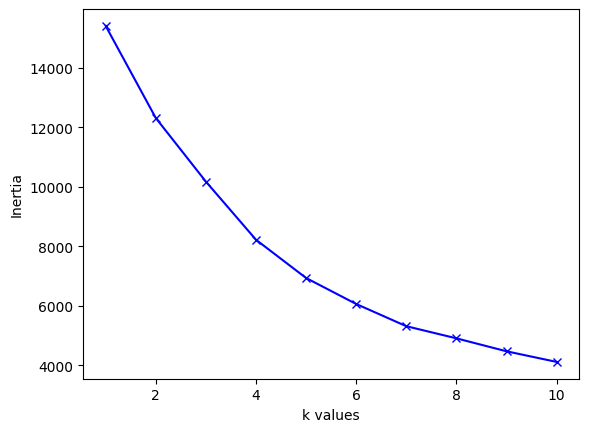

In [34]:
# Creating a graph for inertia for each number of clusters to see what the best number of clusters would be
inertia_values = []
k_values = range(1,11)

for k in k_values:
  kmeans = KMeans(n_clusters = k, random_state = 1024)
  kmeans.fit(scaled_data)
  inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, 'bx-')
plt.xlabel('k values')
plt.ylabel('Inertia')
plt.show()

Based on the inertia graph, it seems like dividing the data into 6 clusters would be good.

In [35]:
# Set number of clusters to 7, then perform K means cluster
num_clusters = 6
kmeans = KMeans(n_clusters = num_clusters)
kmeans.fit(scaled_data)

# Then attached the cluster labels to the original data
crop_data['Cluster'] = kmeans.labels_

In [36]:
# Cheking what kind of crop labels are included in clusters.
# I will check only clusters from 0 to 2 in here
crop_data[crop_data['Cluster'] == 0][['Cluster', 'label']].groupby(by = 'label').count().sort_values(by = 'Cluster', ascending = False)

Cluster
label              
banana          100
cotton          100
muskmelon       100
watermelon      100
maize            95
coffee           21
papaya            9

In [37]:
crop_data[crop_data['Cluster'] == 1][['Cluster', 'label']].groupby(by = 'label').count().sort_values(by = 'Cluster', ascending = False)

Cluster
label               
chickpea         100
kidneybeans      100
pigeonpeas        17
lentil             4
maize              2

In [38]:
crop_data[crop_data['Cluster'] == 2][['Cluster', 'label']].groupby(by = 'label').count().sort_values(by = 'Cluster', ascending = False)

Cluster
label               
blackgram        100
mungbean         100
lentil            95
mothbeans         61
orange            45
papaya            42
mango             23
pigeonpeas        20
pomegranate        5
maize              2

Some crops were all included in the same clusters, however some crops were incldued in a couple different clusters. <br>
However, even when a crop was found in different clusters, it was mostly found in just 2 or sometimes 3 differet clusters. <br> As expected, this probably means each crops have distinctive environmental conditions they live in.

After seeing what crops were in the cluster, I wanted to visualize the distictive characteristics of each clusters. <br>
Well, more specifically, I wanted to see what makes the living condition different for certain crops compared to the others

Therefore, I chose 1 cluster, and graphed it using 2 different environmental factors. <br>
I made the color red for the chosen cluster and the rest as grey so that I can see the what makes the cluster different than the others

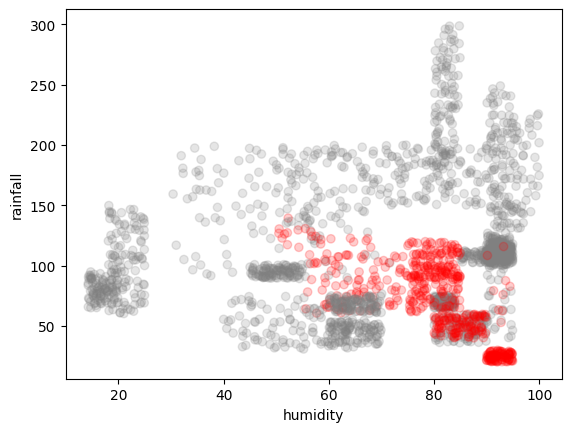

In [41]:
feature_1 = 'humidity'
feature_2 = 'rainfall'
cluster_num = 0

color_list = ['grey'] * num_clusters
if cluster_num < num_clusters:
  color_list[cluster_num] = 'red'
colors = [color_list[label] for label in crop_data['Cluster']]
plt.scatter(crop_data[feature_1], crop_data[feature_2], color = colors, alpha = 0.2)
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.show()

As seen in the graph, it looks like crops in Cluster 0 grows in very humid environment, but rainfall is below average compared to the other crops. <br>
<br>
Crops that are majorly included in Cluster 0 are banana, cotton, muskmelon, watermelon, and maize (95%)

Now, I will make the same graph using all the environmental factors by using seaborn's pairplot function

In [42]:
# Create a pairplot that displays the desired cluster in red and the rest in grey to see the characteristis of the chosen cluster
def pairplot_for_cluster(cluster, num_clusters):
  hue_palette = {}
  for i in range(num_clusters):
    hue_palette[i] = 'grey'
  hue_palette[cluster] = 'red'

  sns.pairplot(crop_data, hue = 'Cluster', palette = hue_palette, corner = True, plot_kws = {'alpha': 0.2})
  plt.title(f'Pairplot for cluster {cluster}')

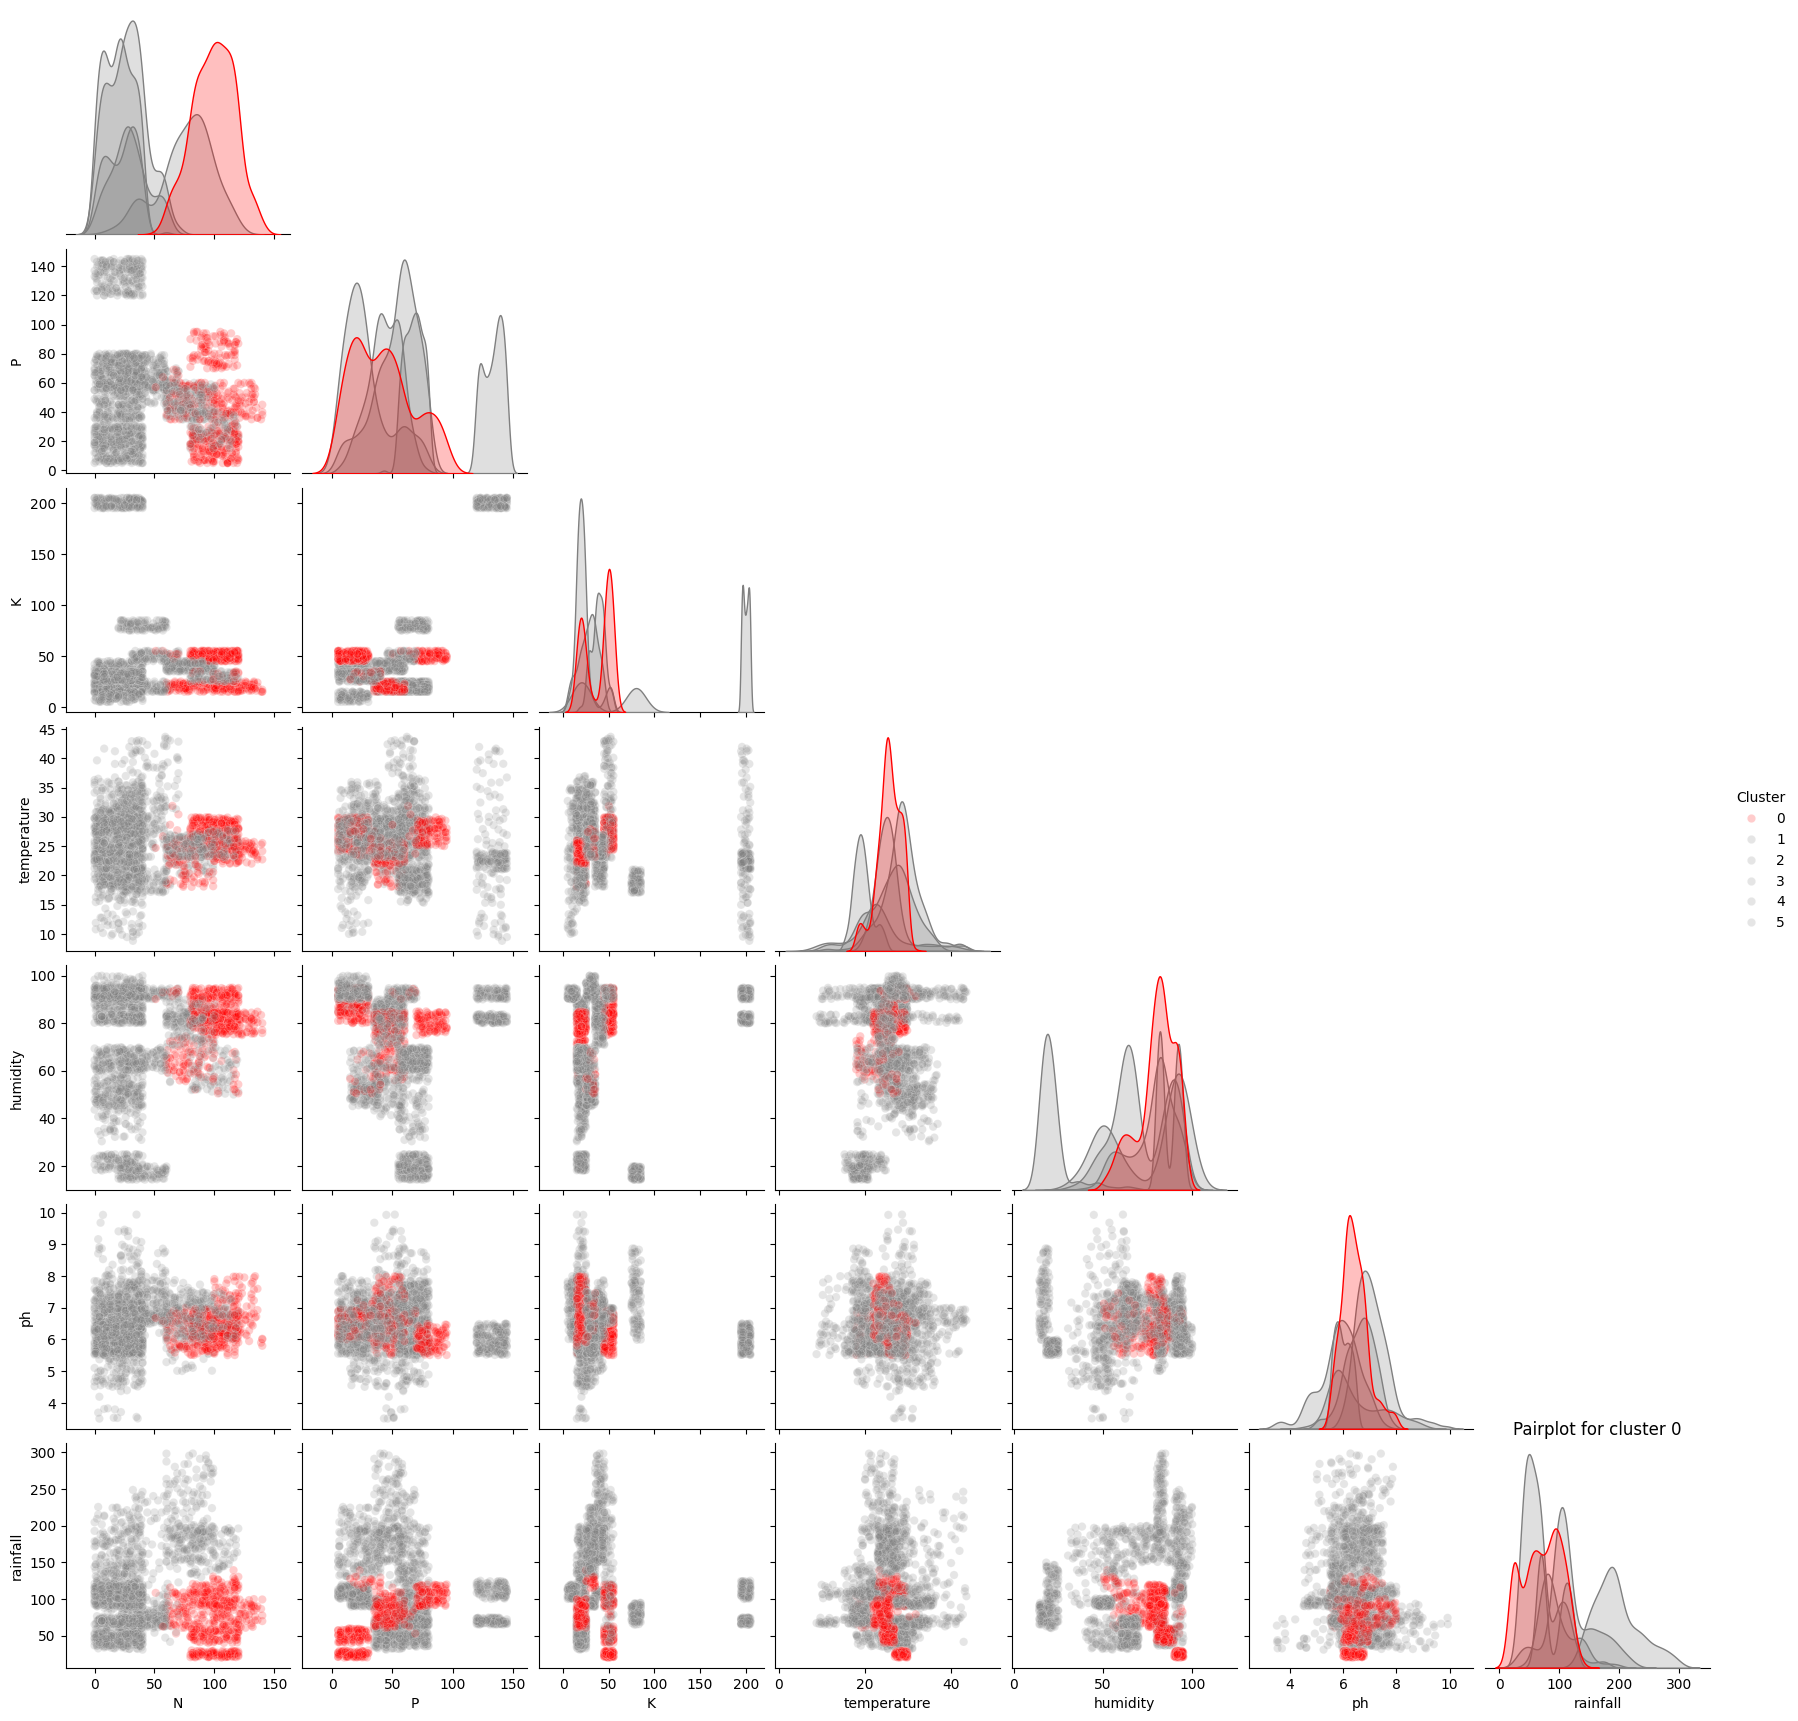

In [43]:
# I will display the pairplots for clusters 0 to 2 only
pairplot_for_cluster(0, num_clusters)

By looking at the pairplot, I can summarize that crops in Cluster 0 likes to grow in: <br>
- Very humid condition
- Not too much rainfall
- Higher Nitrogen (N) content than other crops

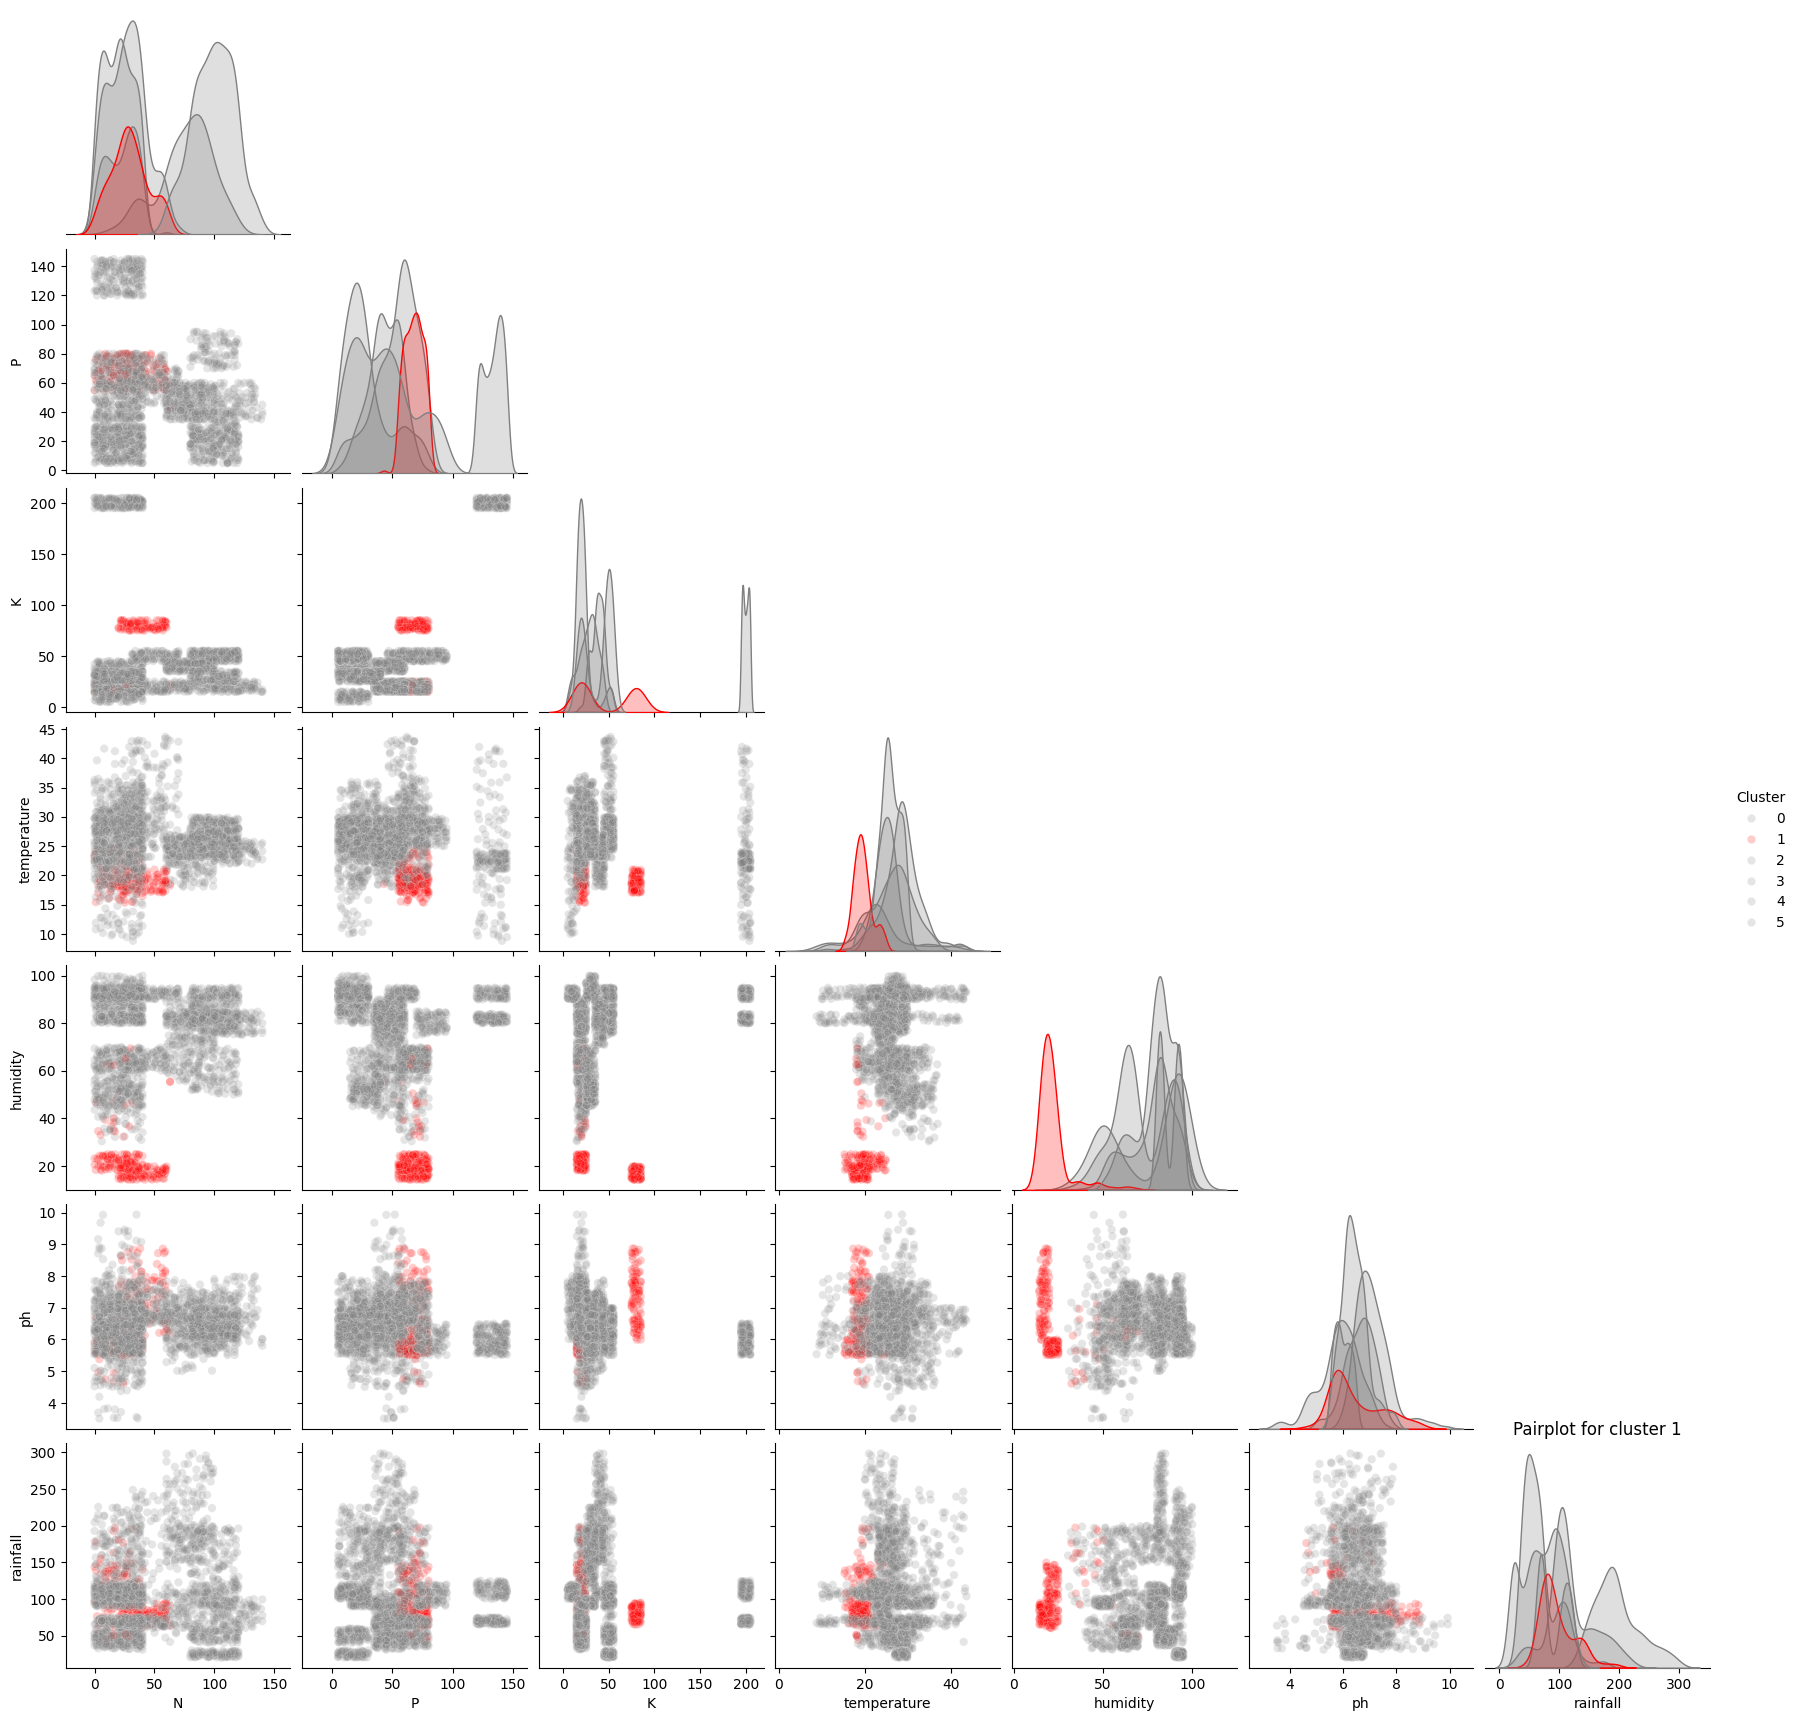

In [44]:
pairplot_for_cluster(1, num_clusters)

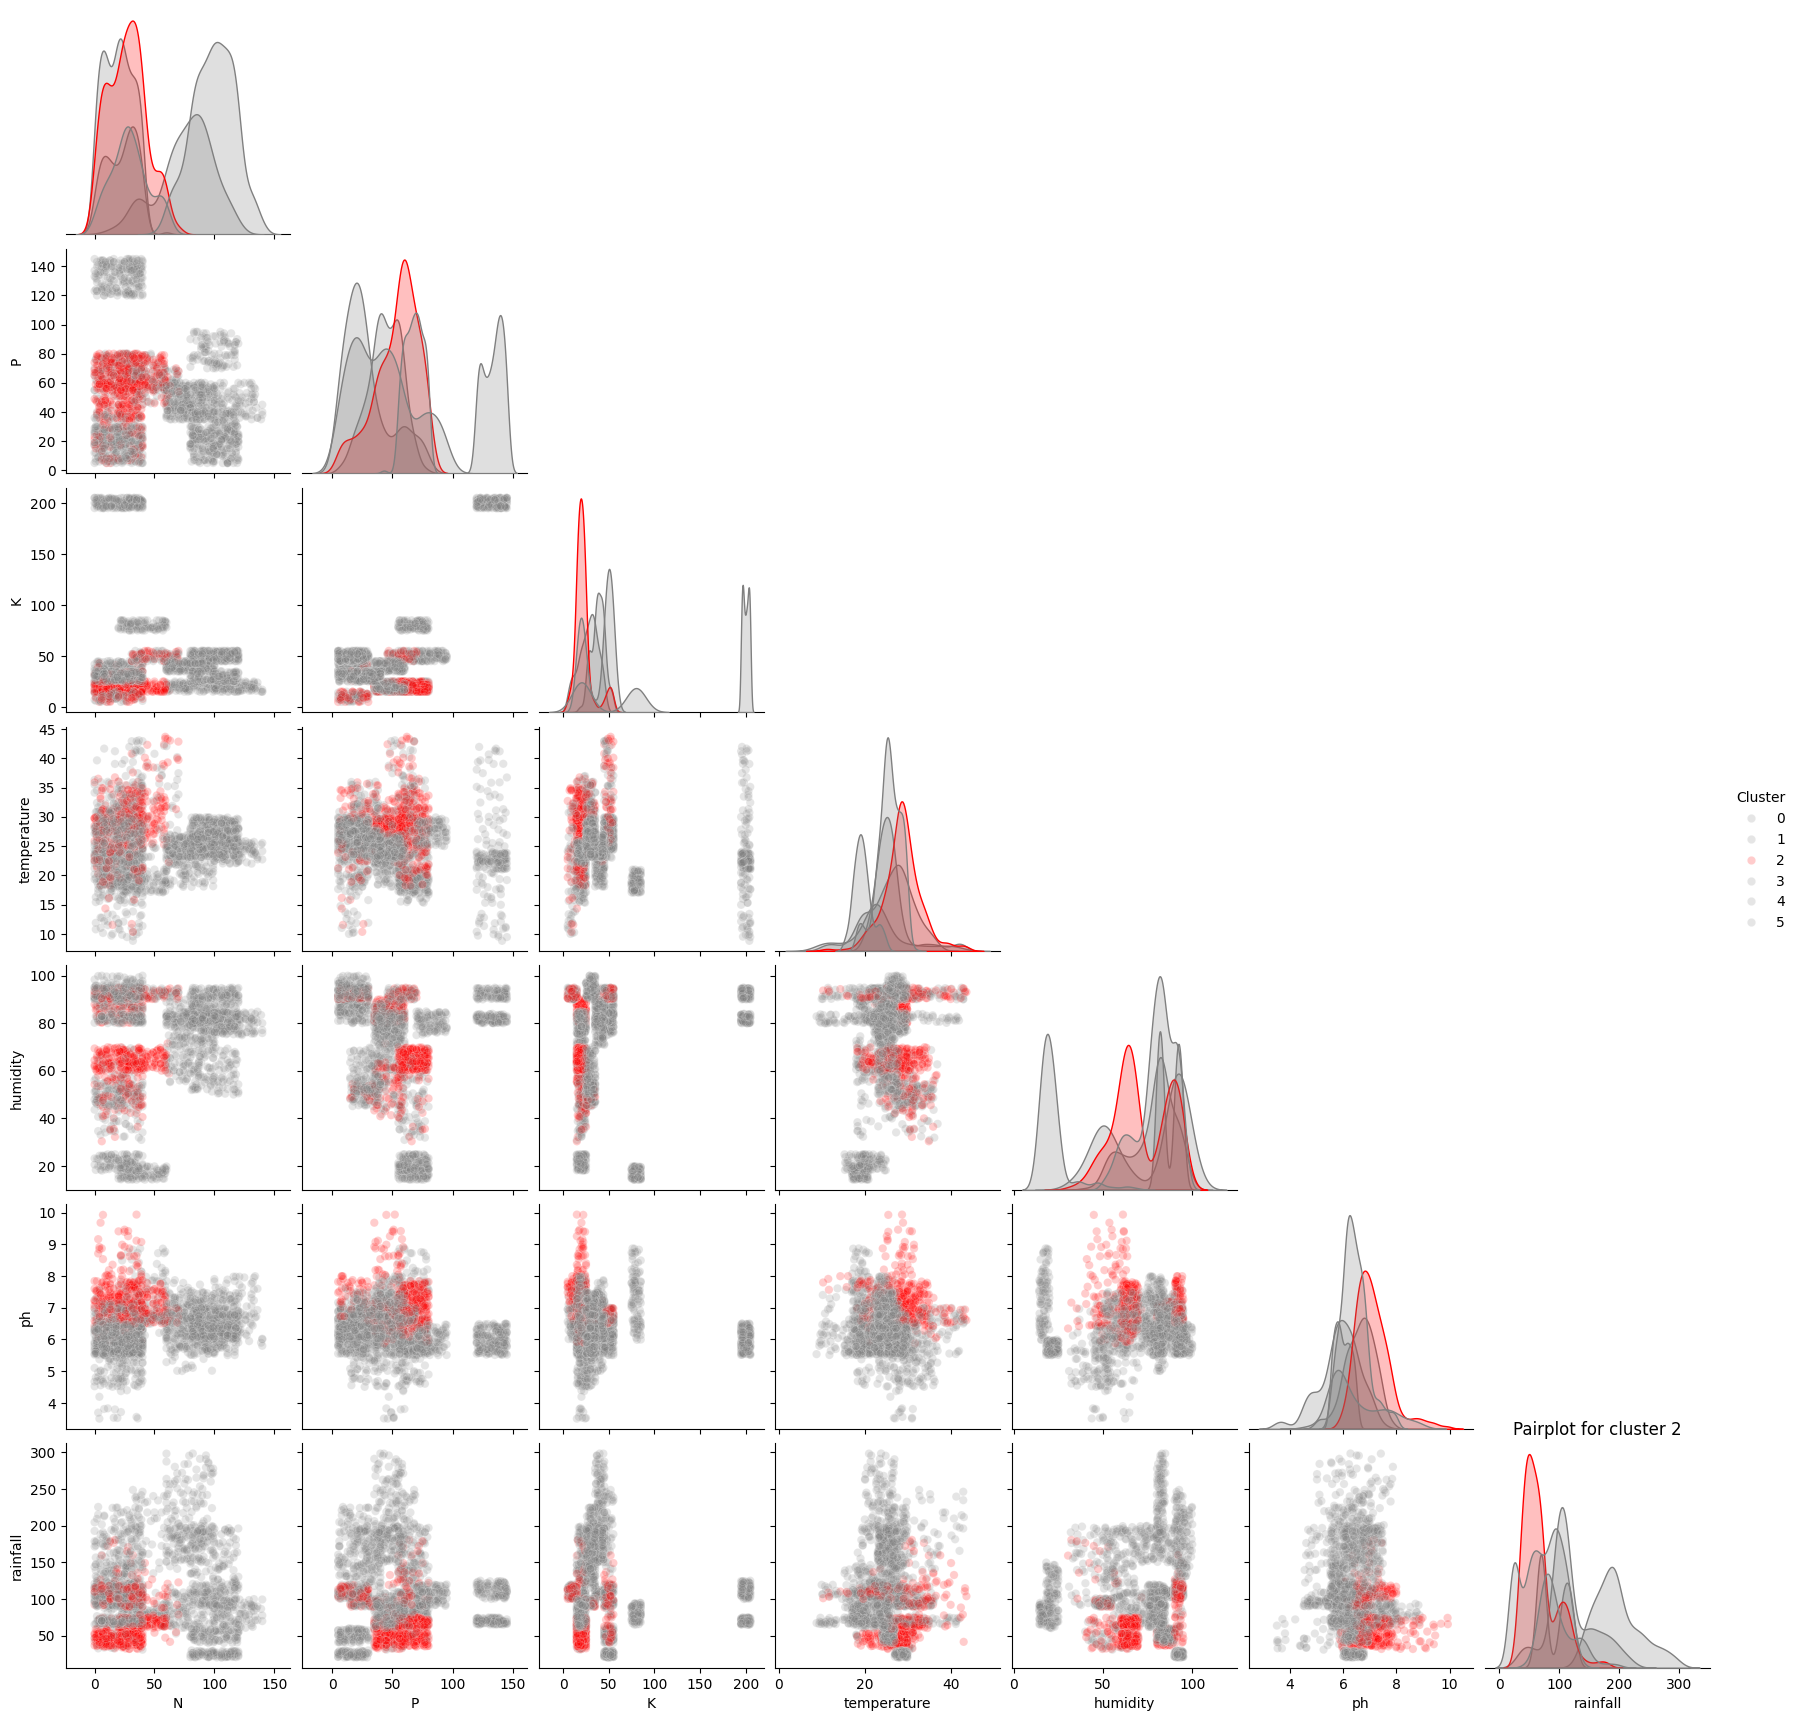

In [45]:
pairplot_for_cluster(2, num_clusters)

Lastly, instead of making pairplot for each clusters, to see more specifically, I wanted to create pairplots that compares a specific crop to the others

In [46]:
# This is very similar to the pairplot_for_cluster function but this one distinguishes specific label (crop) instead of specific cluster
def pairplot_for_crop(df, crop):
  crop_list = df.label.unique().tolist()
  color_list = ['grey'] * len(crop_list)
  hue_palatte = dict(zip(crop_list, color_list))
  hue_palatte[crop] = 'red'

  sns.pairplot(df, hue = 'label', palette = hue_palatte, corner = True, plot_kws = {'alpha': 0.2})
  plt.title(f'Pairplot for {crop}')

As an example, I chose grapes and created a pairplot

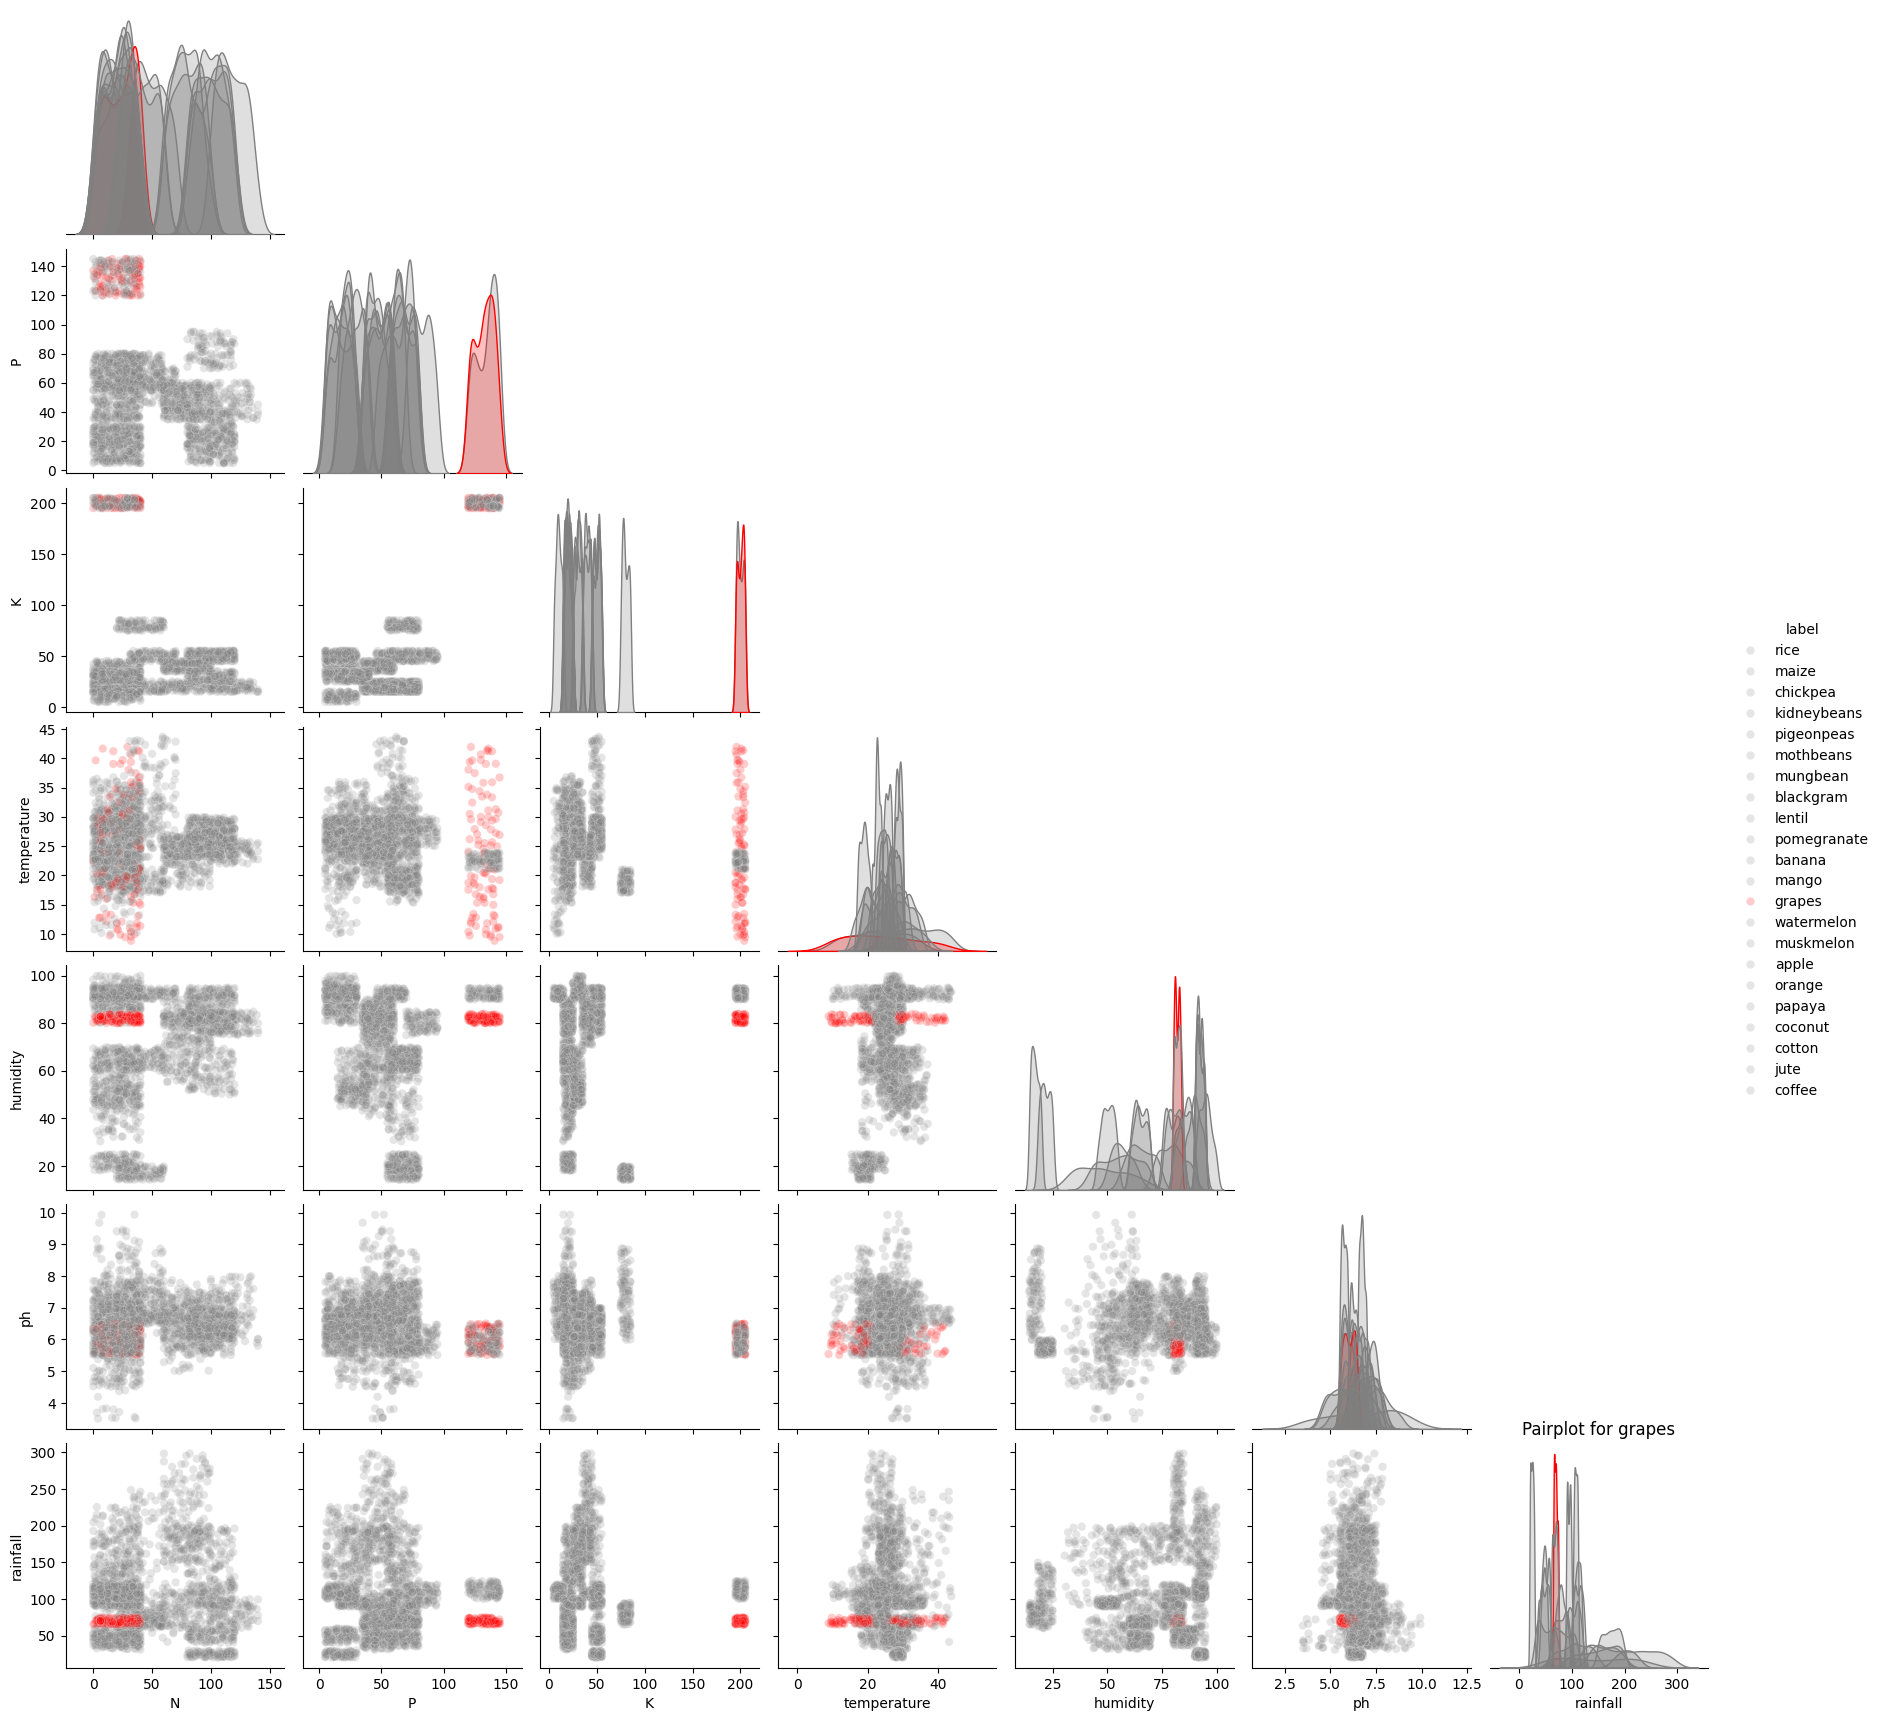

In [47]:
pairplot_for_crop(crop_data.drop('Cluster', axis = 1), 'grapes')

The pairplot tells us that grapes grow in:
- High Phosphorous (P) content
- High Potassium (K) content
- Highly humid environment